#  Regression on Diamonds Price Dataset with SVM

The **Diamonds dataset** from Kaggle is a dataset containing information about the physical and pricing attributes of nearly 54,000 diamonds. The dataset is commonly employed in tasks like regression analysis, feature engineering, and exploratory data analysis.

We will consider a **reduced version** of the dataset, containing 4000 samples, and without categorical features.

### Key Features:
- **Carat**: The weight of the diamond.
- **Depth**: The total depth percentage (z / mean(x, y)).
- **Table**: Width of the diamond's top as a percentage of its widest point.
- **Price**: Price in US dollars.
- **X, Y, Z**: Dimensions of the diamond in mm (length, width, depth).

This dataset is useful for exploring relationships between physical attributes and pricing, and for building predictive models to estimate diamond prices based on their features.

For more information see: https://www.kaggle.com/datasets/shivam2503/diamonds.

# Overview

In the notebook you will perform a complete pipeline of machine learning - regression task. First, you will:
- split the data into training, validation, and test;
- standardize the data.

You will then be asked to learn various SVM models, in particular:
- for each of the kernels *linear*, *poly*, *rbf*, and *sigmoid*, you will learn the best model, choosing among some fixed values of the considered hyperparameters. In particular, the choice of hyperparameters must be done with **5-fold cross-validation**, as we have seen in the labs.

Then, from the models trained with the best hyperparameters selected as above, you will:
- choose the best kernel, using a validation approach (not cross-validation), and
- learn the best SVM model overall.

Furthermore, you will then be asked to estimate the generalization error of the best SVM model you report. 

At the end, just for comparison, you will also be asked to learn a standard linear regression model (with squared loss), and estimate its generalization error.

### IMPORTANT
- Note that in each of the above steps you will have to choose the appropriate split of the data (see the first bullet point above);
- The code should run without requiring modifications even if some best choice of parameters, changes; for example, you should not pass the best value of hyperparameters "manually" (i.e., passing the values as input parameters to the models). The only exception is in the TO DO titled 'ANSWER THE FOLLOWING'
- $\texttt{epsilon}$ parameter: For SVM, since the values to be predicted are all in the thousands of dollars, you will need to always set $\texttt{epsilon} = 100$
- Do not change the printing instructions (other than adding the correct variable name for your code), and do not add printing instructions!

## TO DO - INSERT YOUR NUMERO DI MATRICOLA BELOW

In [1]:
# -- put here your ID number (numero di matricola)
numero_di_matricola = 2155348

The following code loads all required packages

In [2]:
# -- import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn import model_selection
from sklearn import linear_model
from sklearn.model_selection import KFold
from itertools import product

The code below loads the data and remove samples with missing values. It also prints the number of samples and a brief description of our dataset.

In [3]:
# -- load the data - do not change the path below!
df = pd.read_csv('diamonds.csv', sep = ',')

# -- remove the data samples with missing values (NaN)
df = df.dropna()
# -- let's drop the column containing the id of the data
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [4]:
print('Dataset shape:', df.shape)
# -- description of dataset
print(df.describe())

Dataset shape: (4000, 7)
             carat        depth       table         price            x  \
count  4000.000000  4000.000000  4000.00000   4000.000000  4000.000000   
mean      0.797945    61.776925    57.44035   3920.239250     5.735810   
std       0.462251     1.468899     2.26052   3935.292841     1.106897   
min       0.210000    52.200000    52.00000    339.000000     0.000000   
25%       0.400000    61.100000    56.00000    936.000000     4.720000   
50%       0.710000    61.900000    57.00000   2468.000000     5.710000   
75%       1.050000    62.500000    59.00000   5297.500000     6.550000   
max       3.010000    70.600000    79.00000  18730.000000     9.100000   

                 y            z  
count  4000.000000  4000.000000  
mean      5.736307     3.540002  
std       1.099129     0.691834  
min       0.000000     0.000000  
25%       4.730000     2.910000  
50%       5.730000     3.540000  
75%       6.550000     4.040000  
max       8.970000     5.670000  


In [5]:
print('First 5 samples of the dataset:\n\n', df.head(5))

First 5 samples of the dataset:

    carat  depth  table  price     x     y     z
0   0.33   61.7   55.0    564  4.43  4.46  2.74
1   1.20   62.1   57.0   5914  6.78  6.71  4.19
2   0.62   61.0   57.0   2562  5.51  5.54  3.37
3   0.34   63.1   56.0    537  4.41  4.46  2.80
4   1.20   62.5   55.0   5964  6.77  6.84  4.25


In the following cell, we convert our (pandas) dataframe into set X (containing our features) and the set Y (containing our target, i.e., the price)

In [6]:
m = df.shape[0]

# -- let's compute X and Y sets
X = df.drop(columns=['price'], axis=1)
Y = df['price']

print("Total number of samples:", m)

X = X.values
Y = Y.values

# -- print shapes
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

Total number of samples: 4000
X shape:  (4000, 6)
Y shape:  (4000,)


# Data preprocessing

## TO DO - SPLIT DATA INTO TRAINING, VALIDATION, AND TESTING, WITH THE FOLLOWING PERCENTAGES: 60%, 20%, 20%

Use the $\texttt{train\_test\_split}$ function from sklearn.model_selection to do it; in every call fix $\texttt{random\_state}$ to your numero_di_matricola. 
At the end, you should store the data in the following variables:
- X_train, Y_train: training data;
- X_val, Y_val: validation data;
- X_train_val, Y_train_val: training and validation data;
- X_test, Y_test: test data.

The code then prints the number of samples in X_train, X_val, X_train_val, and X_test

**IMPORTANT:**
- first split the data into training+validation and test; the first part of the data in output from $\texttt{train\_test\_split}$ must correspond to the training+validation;
- then split training+validation into training and validation; the first part of the data in output from $\texttt{train\_test\_split}$ must correspond to the training


In [7]:
# -- split data into train (3/5 of samples), validation (1/6 of samples), and test data (the rest)
m_train = int(3./5. * m)
m_val = int((m - m_train) / 2.)
m_test = m - m_train - m_val

# -- split the data into training + validation and test
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=m_test/m, random_state=numero_di_matricola)

# -- split the training + validation data into training and validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, 
                                                  test_size=m_val/(m_train + m_val), random_state=numero_di_matricola)


print("Training size:", X_train.shape[0])
print("Validation size:", X_val.shape[0])
print("Training and validation size:", X_train_val.shape[0])
print("Test size:", X_test.shape[0])

Training size: 2400
Validation size: 800
Training and validation size: 3200
Test size: 800


## TO DO - STANDARDIZE THE DATA

Standardize the data using the $\texttt{preprocessing.StandardScaler}$ from scikit learn.

If V is the name of the variable storing part of the data, the corresponding standardized version should be stored in V_scaled. For example, the scaled version of X_train should be stored in X_train_scaled.

In [8]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_train_val_scaled = scaler.transform(X_train_val)

# SVM models: learning the best model for each kernel

The following function, i.e., $\texttt{k\_fold\_cross\_validation}$, will perform $k$-fold cross validation (with $k$ = 5 by default). Look carefully at the signature of the below function: you have in input some sets X and Y, the default number of folds, and a length-variable keyword argumens, with which the SVM model will be trained in the cross-validation phase. If you are not familiar with the notation, look at kwargs in Python documentation.

In the first lines of the below function, the unpacked parameters (i.e., input parameter $\texttt{param\_grid}$) are converted into a python list by means of cartesian product. The resulting list (i.e., $\texttt{param\_list}$) will be the one for which you need to iterate over and perform $k$-fold cross-validation, using $\texttt{KFold}$ object from scikit-learn.

At the end, note that you need to return $\texttt{best\_param}$, that is the best set of parameters you found with the cross-validation procedure. 

In [9]:
def k_fold_cross_validation(X, Y, num_folds = 5, plots=[], **param_grid):

    # -- grid of hyperparams into list
    param_keys = list(param_grid.keys())
    param_values = list(param_grid.values())
    
    # Generate Cartesian product of values
    combinations = product(*param_values)
    
    # Create a list of dictionaries from combinations
    param_list = [dict(zip(param_keys, combination)) for combination in combinations]

    kf = KFold(n_splits = num_folds)
    
    err_validation_kfold = np.zeros(len(param_list),)
    err_training_kfold = np.zeros(len(param_list),)

    for i, params in enumerate(param_list):
        svm_model = svm.SVR(**params)
    
        print(f'#{i+1} Performing k-fold for params = {params}...')
        
        for train_index, validation_index in kf.split(X):
            X_train_kfold, X_val_kfold = X[train_index], X[validation_index]
            Y_train_kfold, Y_val_kfold = Y[train_index], Y[validation_index]
            
            # -- data scaling: standardize features with respect to the current folds
            scaler_kfold = preprocessing.StandardScaler().fit(X_train_kfold)
            X_train_kfold_scaled = scaler_kfold.transform(X_train_kfold)
            X_val_kfold_scaled = scaler_kfold.transform(X_val_kfold)
        
            # -- learn the model using the training data from the k-fold
            svm_model.fit(X_train_kfold_scaled, Y_train_kfold)
            
            # -- incremental mean
            err_training_kfold[i] += (1.0 - svm_model.score(X_train_kfold, Y_train_kfold))
            err_validation_kfold[i] += (1.0 - svm_model.score(X_val_kfold_scaled, Y_val_kfold))
    
    
    # -- compute the mean
    err_training_kfold /= num_folds
    err_validation_kfold /= num_folds
    
    # -- choose the best paramter: the one that minimizes the (the estimation of the true) loss
    best_param = param_list[np.argmin(err_validation_kfold)]

    
    # Print model selection curve.
    #for v in plots:
        #x = [[i, dic[v]] for i, dic in enumerate(param_list)]
        #x.sort(key=lambda a: a[1])
        #idx = [i[0] for i in x]

    plt.figure()
    jump = len(plots[1])
    for i in range(jump):
        C_vals = [x["C"] for x in param_list]
        
        plt.plot(C_vals[i::jump], err_training_kfold[i::jump], marker='x', label=f"Train {plots[0]} {plots[1][i]}")
        plt.plot(C_vals[i::jump], err_validation_kfold[i::jump], marker='x', label=f"Validation {plots[0]} {plots[1][i]}")
        
        plt.scatter(best_param["C"], np.min(err_validation_kfold), color='b', marker='o', linewidths=5, label=f"opt C = {best_param["C"]}")
        plt.legend()
        plt.xlabel('C')
        plt.ylabel('Error')
        plt.title('SVM: choice of C')
        plt.show()
        plt.close()
    
    return best_param

## TO DO - CHOOSE THE BEST HYPERPARAMETERS FOR LINEAR KERNEL

For the SVM, consider $\texttt{svm.SVR}$ class. We will begin by training the SVM with linear kernel. For the latter, consider the following hyperparameters and their values:

- $C: [0.1, 1, 10, 100, 1000]$

Remember that both the $\texttt{kernel}$ type and the value of $\texttt{epsilon}$ are considered as parameters to pass to the above method. Leave all other input parameters to default. 

Find the best value of the hyperparameters using 5-fold cross validation. Use the function defined above to perform the cross-validation.

Print the best value of the hyperparameters.


Linear SVM:
#1 Performing k-fold for params = {'C': 0.1, 'kernel': 'linear', 'epsilon': 100}...
#2 Performing k-fold for params = {'C': 1.0, 'kernel': 'linear', 'epsilon': 100}...
#3 Performing k-fold for params = {'C': 10.0, 'kernel': 'linear', 'epsilon': 100}...
#4 Performing k-fold for params = {'C': 100.0, 'kernel': 'linear', 'epsilon': 100}...
#5 Performing k-fold for params = {'C': 1000.0, 'kernel': 'linear', 'epsilon': 100}...


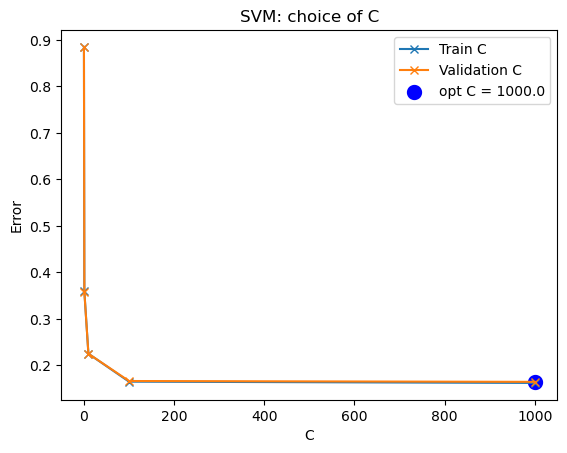

Best value for hyperparameters:  {'C': 1000.0, 'kernel': 'linear', 'epsilon': 100}


In [10]:
print("\nLinear SVM:")
params = {"C": np.logspace(-1, 3, num=5).tolist(), "kernel":["linear"], "epsilon":[100]}
best_linear_param = k_fold_cross_validation(X_train_scaled, Y_train, plots=["C", [" "]], **params)
print("Best value for hyperparameters: ", best_linear_param)

Lets try with a finer grid, aka we train the model setting $C = [1000 - \varepsilon_1, \ 1000 + \varepsilon_2]$


Linear SVM - Finer grid:
#1 Performing k-fold for params = {'C': 100, 'kernel': 'linear', 'epsilon': 100}...
#2 Performing k-fold for params = {'C': 150, 'kernel': 'linear', 'epsilon': 100}...
#3 Performing k-fold for params = {'C': 200, 'kernel': 'linear', 'epsilon': 100}...
#4 Performing k-fold for params = {'C': 250, 'kernel': 'linear', 'epsilon': 100}...
#5 Performing k-fold for params = {'C': 300, 'kernel': 'linear', 'epsilon': 100}...
#6 Performing k-fold for params = {'C': 350, 'kernel': 'linear', 'epsilon': 100}...
#7 Performing k-fold for params = {'C': 400, 'kernel': 'linear', 'epsilon': 100}...
#8 Performing k-fold for params = {'C': 450, 'kernel': 'linear', 'epsilon': 100}...
#9 Performing k-fold for params = {'C': 500, 'kernel': 'linear', 'epsilon': 100}...
#10 Performing k-fold for params = {'C': 550, 'kernel': 'linear', 'epsilon': 100}...
#11 Performing k-fold for params = {'C': 600, 'kernel': 'linear', 'epsilon': 100}...
#12 Performing k-fold for params = {'C': 650, 'k

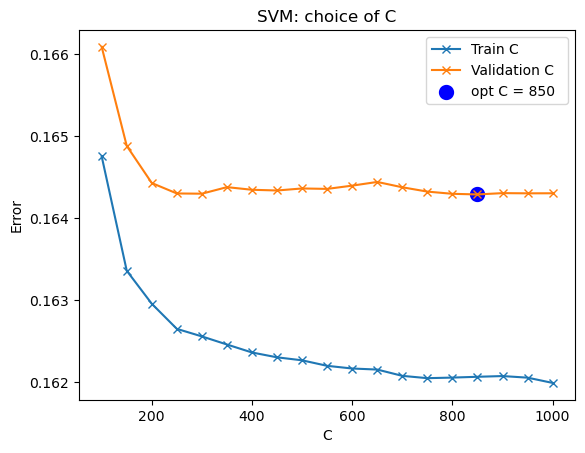

Best value for hyperparameters:  {'C': 850, 'kernel': 'linear', 'epsilon': 100}


In [11]:
print("\nLinear SVM - Finer grid:")
params = {"C": np.arange(100, 1050, 50).tolist(), "kernel":["linear"], "epsilon":[100]}
best_linear_param = k_fold_cross_validation(X_train_scaled, Y_train, plots=["C", [" "]], **params)
print("Best value for hyperparameters: ", best_linear_param)

## TO DO - LEARN A MODEL WITH LINEAR KERNEL AND BEST CHOICE OF HYPERPARAMETERS

This model will be compared with the best models with other kernels using validation (not cross validation).

DO NOT PASS PARAMETERS BY HARD-CODING THEM IN THE CODE.

Print the **training score** (that is, $R^2$ coefficient) of the best model, trained with the best parameter find from the above cell.

In [12]:
best_linear_model = svm.SVR(**best_linear_param)
best_linear_model.fit(X_train_scaled, Y_train)
print("Training score:", best_linear_model.score(X_train_scaled, Y_train))

Training score: 0.8380478702237009


## TO DO - CHOOSE THE BEST HYPERPARAMETERS FOR POLY KERNEL

Now, let's consider $\texttt{svm.SVR}$ with polynomial kernel. Consider the following hyperparameters and their values:
- $C: [0.1, 1, 10, 100, 1000]$
- $degree: [2, 3, 4]$

Leave all other input parameters to default. 

Find the best value of the hyperparameters using 5-fold cross validation. Use the function defined above to perform the cross-validation.

Print the best value of the hyperparameters.


Poly SVM
#1 Performing k-fold for params = {'C': 1000, 'kernel': 'poly', 'degree': 2, 'epsilon': 100}...
#2 Performing k-fold for params = {'C': 1000, 'kernel': 'poly', 'degree': 3, 'epsilon': 100}...
#3 Performing k-fold for params = {'C': 1000, 'kernel': 'poly', 'degree': 4, 'epsilon': 100}...
#4 Performing k-fold for params = {'C': 1200, 'kernel': 'poly', 'degree': 2, 'epsilon': 100}...
#5 Performing k-fold for params = {'C': 1200, 'kernel': 'poly', 'degree': 3, 'epsilon': 100}...
#6 Performing k-fold for params = {'C': 1200, 'kernel': 'poly', 'degree': 4, 'epsilon': 100}...
#7 Performing k-fold for params = {'C': 1400, 'kernel': 'poly', 'degree': 2, 'epsilon': 100}...
#8 Performing k-fold for params = {'C': 1400, 'kernel': 'poly', 'degree': 3, 'epsilon': 100}...
#9 Performing k-fold for params = {'C': 1400, 'kernel': 'poly', 'degree': 4, 'epsilon': 100}...
#10 Performing k-fold for params = {'C': 1600, 'kernel': 'poly', 'degree': 2, 'epsilon': 100}...
#11 Performing k-fold for par

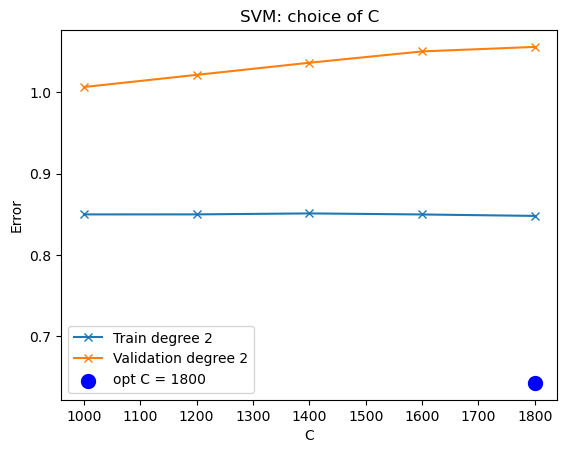

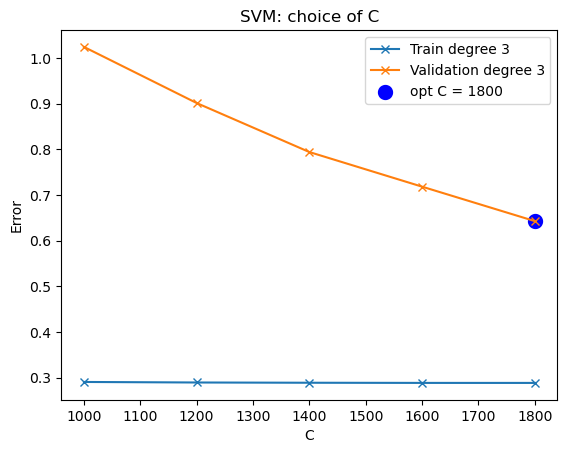

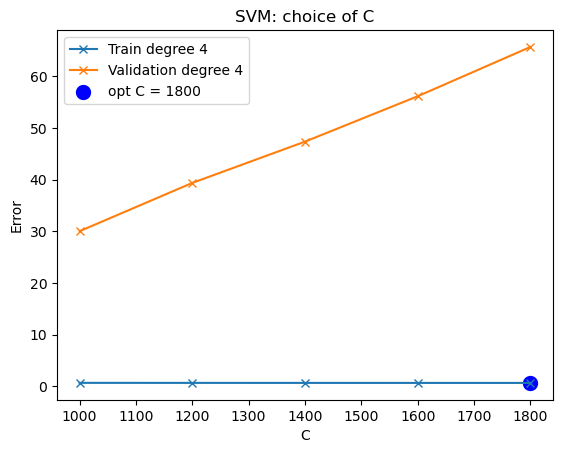

Best value for hyperparameters:  {'C': 1800, 'kernel': 'poly', 'degree': 3, 'epsilon': 100}


In [13]:
print("\nPoly SVM")
params = {"C":np.arange(1000, 2000, 200).tolist(), "kernel":["poly"], "degree":[2, 3, 4], "epsilon":[100]}
best_poly_param = k_fold_cross_validation(X_train_scaled, Y_train, plots=["degree", [2, 3, 4]], **params)
print("Best value for hyperparameters: ", best_poly_param)

## TO DO - LEARN A MODEL WITH POLY KERNEL AND BEST CHOICE OF HYPERPARAMETERS

This model will be compared with the best models with other kernels using validation (not cross validation).

DO NOT PASS PARAMETERS BY HARD-CODING THEM IN THE CODE.

Print the **training score** (that is, $R^2$ coefficient) of the best model, trained with the best parameter find from the above cell.

In [14]:
best_poly_model = svm.SVR(**best_poly_param)
best_poly_model.fit(X_train_scaled, Y_train)
print("Training score:", best_poly_model.score(X_train_scaled, Y_train))

Training score: 0.7096444812429539


## TO DO - CHOOSE THE BEST HYPERPARAMETERS FOR RBF KERNEL

Consider $\texttt{svm.SVR}$ with RBF kernel. Consider the following hyperparameters and their values:
- $C: [0.1, 1, 10, 100, 1000]$
- $gamma: [0.01, 0.03, 0.04, 0.05]$

Leave all other input parameters to default. 

Find the best value of the hyperparameters using 5-fold cross validation. Use the function defined above to perform the cross-validation.

Print the best value of the hyperparameters.


RBF SVM
#1 Performing k-fold for params = {'C': 1.0, 'kernel': 'rbf', 'gamma': 0.01, 'epsilon': 100}...
#2 Performing k-fold for params = {'C': 1.0, 'kernel': 'rbf', 'gamma': 0.03, 'epsilon': 100}...
#3 Performing k-fold for params = {'C': 1.0, 'kernel': 'rbf', 'gamma': 0.04, 'epsilon': 100}...
#4 Performing k-fold for params = {'C': 1.0, 'kernel': 'rbf', 'gamma': 0.05, 'epsilon': 100}...
#5 Performing k-fold for params = {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.01, 'epsilon': 100}...
#6 Performing k-fold for params = {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.03, 'epsilon': 100}...
#7 Performing k-fold for params = {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.04, 'epsilon': 100}...
#8 Performing k-fold for params = {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.05, 'epsilon': 100}...
#9 Performing k-fold for params = {'C': 100.0, 'kernel': 'rbf', 'gamma': 0.01, 'epsilon': 100}...
#10 Performing k-fold for params = {'C': 100.0, 'kernel': 'rbf', 'gamma': 0.03, 'epsilon': 100}...
#11 Performing k-fold 

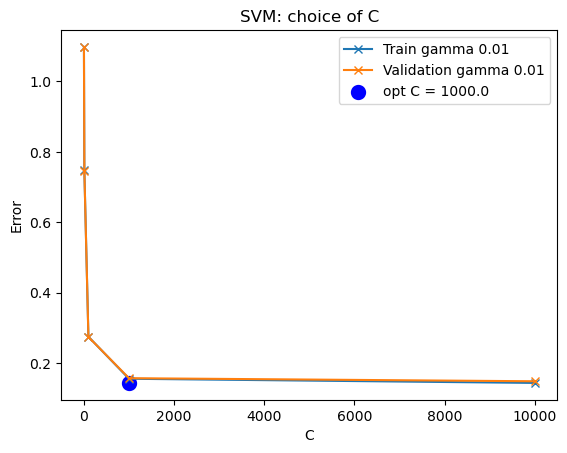

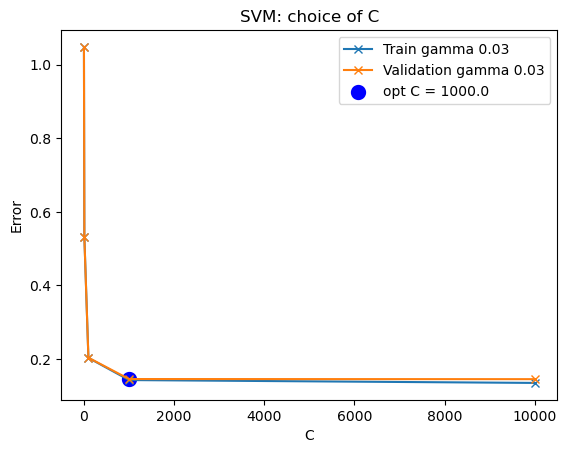

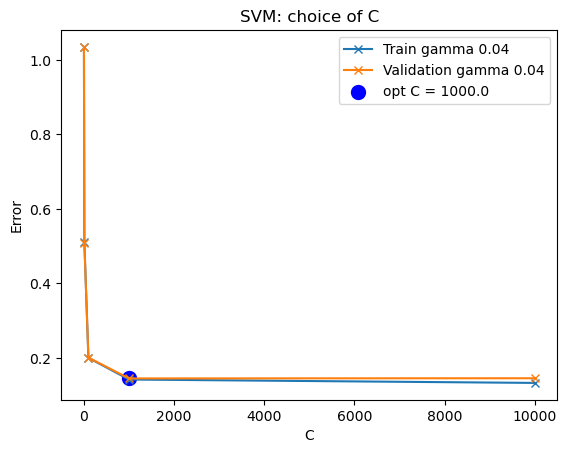

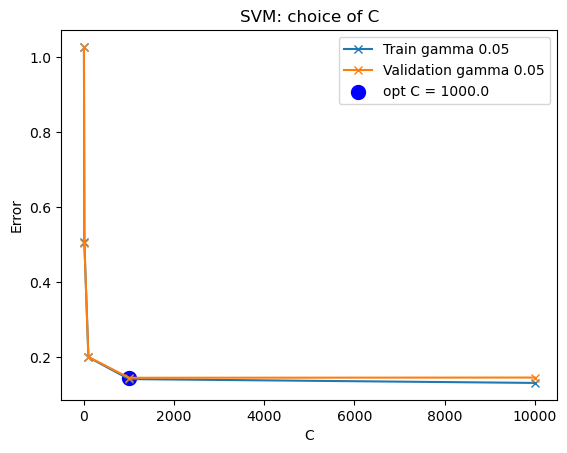

Best value for hyperparameters:  {'C': 1000.0, 'kernel': 'rbf', 'gamma': 0.05, 'epsilon': 100}


In [15]:
print("\nRBF SVM")
params = {"C": np.logspace(0, 4, num=5).tolist(), "kernel":["rbf"], "gamma":[0.01, 0.03, 0.04, 0.05], "epsilon":[100]}
best_rbf_param = k_fold_cross_validation(X_train_scaled, Y_train, plots=["gamma", [0.01, 0.03, 0.04, 0.05]], **params)
print("Best value for hyperparameters: ", best_rbf_param)

## TO DO - LEARN A MODEL WITH RBF KERNEL AND BEST CHOICE OF HYPERPARAMETERS

This model will be compared with the best models with other kernels using validation (not cross validation).

DO NOT PASS PARAMETERS BY HARD-CODING THEM IN THE CODE.

Print the **training score** (that is, $R^2$ coefficient) of the best model, trained with the best parameter find from the above cell.

In [16]:
best_rbf_model = svm.SVR(**best_rbf_param)
best_rbf_model.fit(X_train_scaled, Y_train)
print("Training score:", best_rbf_model.score(X_train_scaled, Y_train))

Training score: 0.8594433285206394


## TO DO - CHOOSE THE BEST HYPERPARAMETERS FOR SIGMOID KERNEL

Consider $\texttt{svm.SVR}$ with sigmoid kernel. Consider the following hyperparameters and their values:
- $C: [0.1, 1, 10, 100, 1000]$
- $gamma: [0.01, 0.05, 0.1]$
- $coef0: [0, 1]$

Leave all other input parameters to default. 

Find the best value of the hyperparameters using 5-fold cross validation. Use the function defined above to perform the cross-validation.

Print the best value of the hyperparameters.


Sigmoid SVM
#1 Performing k-fold for params = {'C': 1.0, 'kernel': 'sigmoid', 'gamma': 0.01, 'coef0': 0, 'epsilon': 100}...
#2 Performing k-fold for params = {'C': 1.0, 'kernel': 'sigmoid', 'gamma': 0.01, 'coef0': 1, 'epsilon': 100}...
#3 Performing k-fold for params = {'C': 1.0, 'kernel': 'sigmoid', 'gamma': 0.05, 'coef0': 0, 'epsilon': 100}...
#4 Performing k-fold for params = {'C': 1.0, 'kernel': 'sigmoid', 'gamma': 0.05, 'coef0': 1, 'epsilon': 100}...
#5 Performing k-fold for params = {'C': 1.0, 'kernel': 'sigmoid', 'gamma': 0.1, 'coef0': 0, 'epsilon': 100}...
#6 Performing k-fold for params = {'C': 1.0, 'kernel': 'sigmoid', 'gamma': 0.1, 'coef0': 1, 'epsilon': 100}...
#7 Performing k-fold for params = {'C': 100.0, 'kernel': 'sigmoid', 'gamma': 0.01, 'coef0': 0, 'epsilon': 100}...
#8 Performing k-fold for params = {'C': 100.0, 'kernel': 'sigmoid', 'gamma': 0.01, 'coef0': 1, 'epsilon': 100}...
#9 Performing k-fold for params = {'C': 100.0, 'kernel': 'sigmoid', 'gamma': 0.05, 'coef0

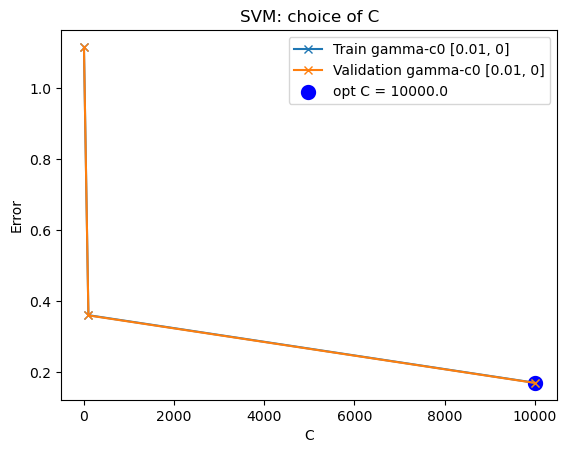

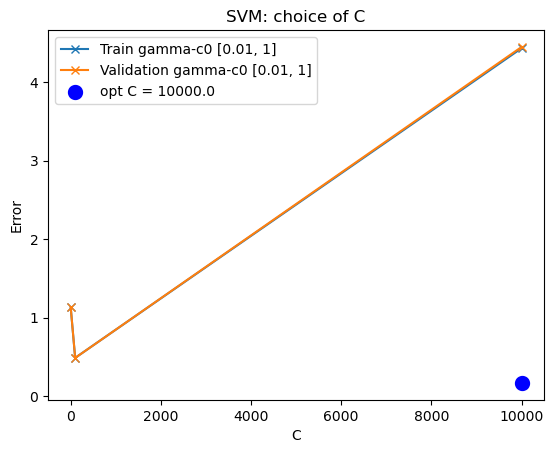

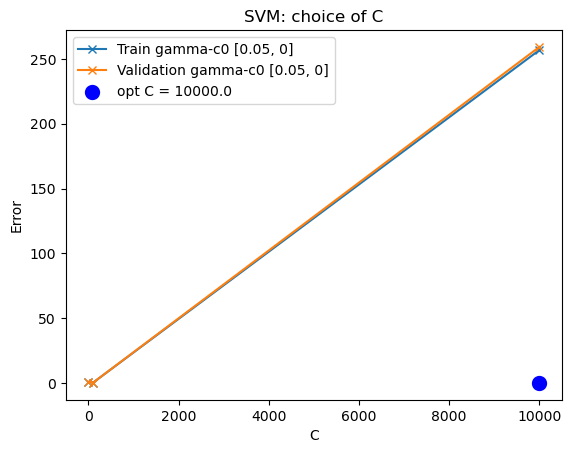

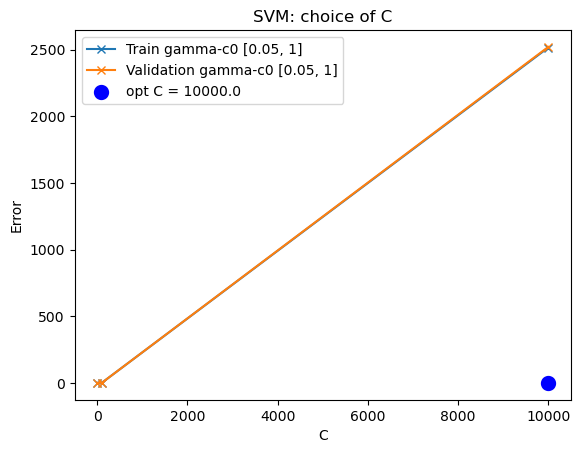

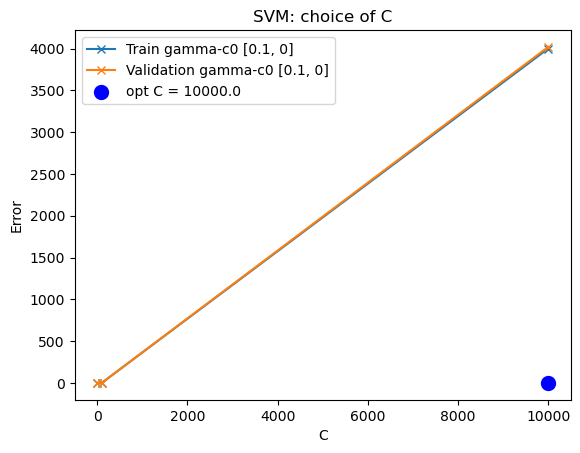

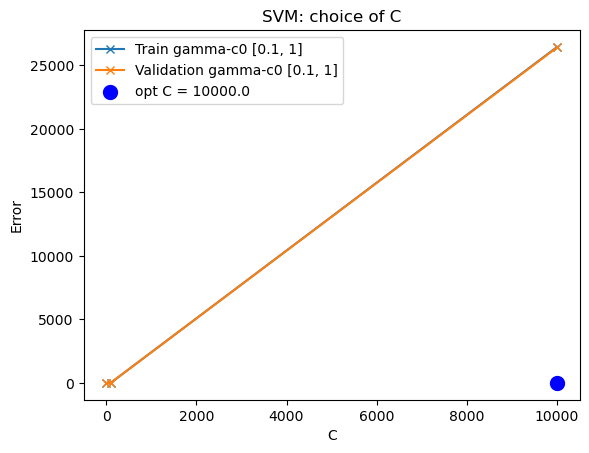

Best value for hyperparameters:  {'C': 10000.0, 'kernel': 'sigmoid', 'gamma': 0.01, 'coef0': 0, 'epsilon': 100}


In [17]:
print("\nSigmoid SVM")
params = {"C": np.logspace(0, 4, num=3).tolist(), "kernel":["sigmoid"], "gamma":[0.01, 0.05, 0.1], "coef0":[0, 1], "epsilon":[100]}
best_sigmoid_param = k_fold_cross_validation(X_train_scaled, Y_train, plots=["gamma-c0", [[0.01, 0], [0.01, 1], [0.05, 0], [0.05, 1], [0.1, 0], [0.1, 1]]], **params)
print("Best value for hyperparameters: ", best_sigmoid_param)

## TO DO - LEARN A MODEL WITH SIGMOID KERNEL AND BEST CHOICE OF HYPERPARAMETERS

This model will be compared with the best models with other kernels using validation (not cross validation).

DO NOT PASS PARAMETERS BY HARD-CODING THEM IN THE CODE.

Print the **training score** (that is, $R^2$ coefficient) of the best model, trained with the best parameter find from the above cell.

In [18]:
best_sigmoid_model = svm.SVR(**best_sigmoid_param)
best_sigmoid_model.fit(X_train_scaled, Y_train)
print("Training score:", best_sigmoid_model.score(X_train_scaled, Y_train))

Training score: 0.8303896231021834


## TO DO - USE VALIDATION TO CHOOSE THE BEST MODEL AMONG THE ONES LEARNED FOR THE VARIOUS KERNELS

Use validation to choose the best model among the four ones (one for each kernel) you have learned above.

Print, following exactly the order described here, with 1 value for each line:
- the validation score of SVM with linear kernel (the template below does not include such print)
- the validation score of SVM with polynomial kernel (the template below does not include such print)
- the validation score of SVM with rbf kernel (the template below does not include such print)
- the validation score of SVM with sigmoid kernel (the template below does not include such print)
- the best kernel (e.g., sigmoid) 
- the validation score of the best kernel 

For the first 4 prints, use the format: "*kernel* validation score: ". For example, for linear kernel "linear validation score: ", for rbf "rbf validation score: "

In [19]:
print("\nVALIDATION TO CHOOSE SVM KERNEL:")

# Stores all the validation scores.
val_scores = {}

# Linear
val_scores["linear"] = best_linear_model.score(X_val_scaled, Y_val)
print("Validation score of SVM with linear kernel:", val_scores["linear"])

# Poly
val_scores["polynomial"] = best_poly_model.score(X_val_scaled, Y_val)
print("Validation score of SVM with polynomial kernel:", val_scores["polynomial"])

# rbf
val_scores["rbf"] = best_rbf_model.score(X_val_scaled, Y_val)
print("Validation score of SVM with rbf kernel:", val_scores["rbf"])

# sigmoid
val_scores["sigmoid"] = best_sigmoid_model.score(X_val_scaled, Y_val)
print("Validation score of SVM with sigmoid kernel:", val_scores["sigmoid"])

best_kernel = max(val_scores.items(), key=lambda x: x[1])[0]

print("\n---\nBest kernel: ", best_kernel)
print("Validation score of best kernel: ", val_scores[best_kernel])


VALIDATION TO CHOOSE SVM KERNEL:
Validation score of SVM with linear kernel: 0.8386508279757128
Validation score of SVM with polynomial kernel: 0.6492226561450207
Validation score of SVM with rbf kernel: 0.8701550809301452
Validation score of SVM with sigmoid kernel: 0.8350171183084987

---
Best kernel:  rbf
Validation score of best kernel:  0.8701550809301452


## TO DO - LEARN THE FINAL MODEL FOR WHICH YOU WANT TO ESTIMATE THE GENERALIZATION SCORE

Learn the final model (i.e., the one you would use to make predictions about future data).

Print the **final model hyperparameters** and the **score** of the model on the data used to learn it.

In [20]:
print("\nBEST MODEL:")

# Save all the best param associated to the kernel function used
best_params = {"linear":best_linear_param, "polynomial":best_poly_param, "rbf":best_rbf_param, "sigmoid":best_sigmoid_param}

# Learn the final model
final_model = svm.SVR(**best_params[best_kernel])
final_model.fit(X_train_val_scaled, Y_train_val)

print("Best model hyperparameters:", best_params[best_kernel])
print("Score of the best model on the data used to learn it: ", final_model.score(X_train_val_scaled, Y_train_val))


BEST MODEL:
Best model hyperparameters: {'C': 1000.0, 'kernel': 'rbf', 'gamma': 0.05, 'epsilon': 100}
Score of the best model on the data used to learn it:  0.8618444826385092


## TO DO - PRINT THE ESTIMATE  OF THE GENERALIZATION SCORE FOR THE FINAL MODEL

Print the estimate of the generalization **score** for the final model. The generalization "score" is the score computed on the data used to estimate the generalization error.

In [21]:
print("\nGENERALIZATION SCORE BEST MODEL:")
print("Estimate of the generalization score for best SVM model: ", final_model.score(X_test_scaled, Y_test))


GENERALIZATION SCORE BEST MODEL:
Estimate of the generalization score for best SVM model:  0.8784008956688572


## TO DO - ANSWER THE FOLLOWING

Print the **training score** (score on data used to train the model) and the **generalization score** (score on data used to assess generalization) of the final SVM model THAT YOU OBTAIN WHEN YOU RUN THE CODE, one per line, printing the smallest one first. 

NOTE: THE VALUES HERE SHOULD BE HARDCODED.

Print you answer (YES/NO) to the following question: does the relation (i.e., smaller, larger) between the training score and the generalization score agree with the theory?

Print your motivation for the YES/NO answer above, using at most 500 characters.

In [22]:
print("\nANSWER")

print("YES")

# -- note that you may have to invert the order of the following 2 lines, print the smallest 1 first
print("Generalization score: ", final_model.score(X_test_scaled, Y_test))
print("Training score: ", final_model.score(X_train_val_scaled, Y_train_val))

# -- the following is a string with you answer
motivation = "TODO"

print(motivation)


ANSWER
YES
Generalization score:  0.8784008956688572
Training score:  0.8618444826385092
TODO


## TO DO: LEARN A STANDARD LINEAR MODEL
Learn a standard linear model using scikit learn.

Print the **score** of the model on the data used to learn it.

Print the **generalization score** of the model.

In [23]:
print("\nLR MODEL")
LR = linear_model.LinearRegression()
LR.fit(X_train_val_scaled, Y_train_val)
print("Score of LR model on data used to learn it: ", LR.score(X_train_val_scaled, Y_train_val))
print("Generalization score of LR model: ", LR.score(X_test_scaled, Y_test))


LR MODEL
Score of LR model on data used to learn it:  0.8490770864990943
Generalization score of LR model:  0.8651406351751628
